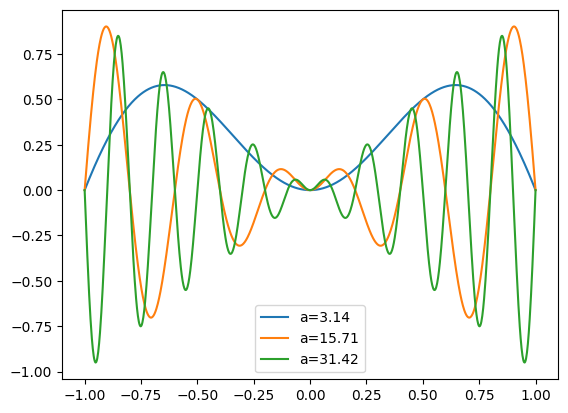

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

def func(x,a):
    return x*np.sin(a*x)
# Assume X_train and y_train are your training data(
a = np.array([1., 5., 10.]) * np.pi
X_train = np.linspace(-1, 1, 1000)
for i, element in enumerate(a):
    plt.plot(X_train, func(X_train,element), label=f'a={element:.2f}')
plt.legend()
y_train = func(X_train, 1*np.pi)
neurons_per_hidden_layer=[2**n for n in range (9)]
num_hidden_layers=[2**n for n in range (8)]
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

def create_custom_network(num_hidden_layers, neurons_per_hidden_layer, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate):
    """
    Create a custom neural network with specified number of hidden layers, each having the same number of neurons.
    The output layer is always linear.

    :param num_hidden_layers: Integer, the number of hidden layers.
    :param neurons_per_hidden_layer: Integer, number of neurons in each hidden layer.
    :param output_neurons: Integer, number of neurons in the output layer.
    :param hidden_layer_types: List of strings, activation functions for the hidden layers.
    :param input_shape: Tuple, the shape of the input data.
    :param num_epochs: Integer, number of epochs for training.
    :param learning_rate: Float, learning rate for the optimizer.

    :return: A compiled TensorFlow model.
    """

    model = Sequential()

    # Adding hidden layers
    for i in range(num_hidden_layers):
        if i == 0:
            # First layer with input shape defined
            model.add(Dense(neurons_per_hidden_layer, activation=hidden_layer_types[i], input_shape=input_shape))
        else:
            # Subsequent hidden layers
            model.add(Dense(neurons_per_hidden_layer, activation=hidden_layer_types[random.randint(0, len(hidden_layer_types)-1)]))

    # Adding the output layer with linear activation
    model.add(Dense(output_neurons, activation='linear'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model, num_epochs

# Example Usage
# num_hidden_layers = 1 # Number of hidden layers

output_neurons = 1  # Neurons in the output layer
hidden_layer_types = ['tanh']  # Activation functions for hidden layers
input_shape = (1,)  # Adjust based on your input features
num_epochs = 100  # Number of epochs
learning_rate = 0.001  # Learning rate


# Now you can fit the model on your data using model.fit()


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.1747
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0991
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0664
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0497
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0471
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0453
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 13/100
32/32 [=================

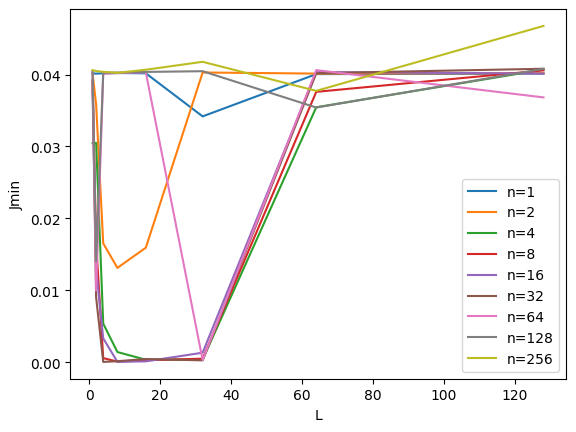

In [8]:
Jmin_tanh_10pi_l=[]
hidden_layer_types = ['tanh']  # Activation functions for hidden layers

for element in neurons_per_hidden_layer:
  epsilon = []
  for items in num_hidden_layers:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_tanh_10pi_l.append(epsilon)

for arrays in Jmin_tanh_10pi_l :
  plt.plot(num_hidden_layers,arrays)
plt.xlabel("L")
plt.ylabel("Jmin")
plt.savefig('Jmin_tanh_10pi_l.svg')
plt.legend(['n=1', 'n=2', 'n=4', 'n=8','n=16','n=32','n=64','n=128','n=256','n=512','n=1024'])
plt.show()

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.2552
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2315
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2155
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2045
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1973
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1925
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1893
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1868
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1813
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 13/100
32/32 [=================

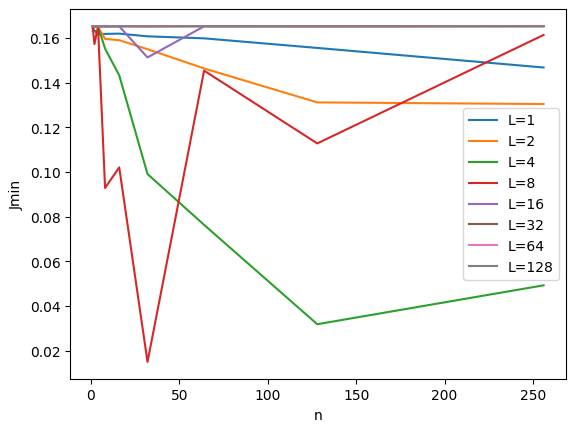

In [9]:
y_train = func(X_train, 10*np.pi)
hidden_layer_types = ['relu']
Jmin_relu_10pi_n=[]
for items in num_hidden_layers:
  epsilon = []
  for element in neurons_per_hidden_layer:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_relu_10pi_n.append(epsilon)
for arrays in Jmin_relu_10pi_n:
  plt.plot(neurons_per_hidden_layer,arrays)
plt.xlabel("n")
plt.ylabel("Jmin")
plt.savefig('Jmin_relu_10pi_n.svg')
plt.legend(['L=1', 'L=2', 'L=4', 'L=8','L=16','L=32','L=64','L=128'])
plt.show()

Jmin_relu_10pi_l=[]
for element in neurons_per_hidden_layer:
  epsilon = []
  for items in num_hidden_layers:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_relu_10pi_l.append(epsilon)

for arrays in Jmin_relu_10pi_l :
  plt.plot(num_hidden_layers,arrays)
plt.xlabel("L")
plt.ylabel("Jmin")
plt.savefig('Jmin_relu_10pi_l.svg')
plt.legend(['n=1', 'n=2', 'n=4', 'n=8','n=16','n=32','n=64','n=128','n=256','n=512','n=1024'])
plt.show()


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.2178
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1994
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1871
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1743
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1713
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1697
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1687
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1677
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1676
Epoch 13/100
32/32 [=================

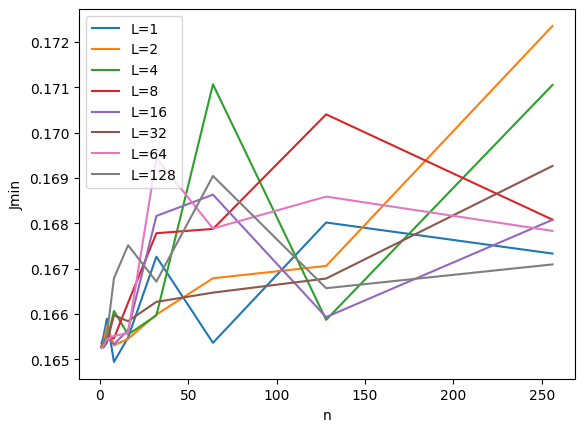

In [10]:
y_train = func(X_train, 10*np.pi)
hidden_layer_types = ['sigmoid']
Jmin_sigmoid_10pi_n=[]
for items in num_hidden_layers:
  epsilon = []
  for element in neurons_per_hidden_layer:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_sigmoid_10pi_n.append(epsilon)
for arrays in Jmin_sigmoid_10pi_n:
  plt.plot(neurons_per_hidden_layer,arrays)
plt.xlabel("n")
plt.ylabel("Jmin")
plt.savefig('Jmin_sigmoid_10pi_n.svg')
plt.legend(['L=1', 'L=2', 'L=4', 'L=8','L=16','L=32','L=64','L=128'])
plt.show()

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.7366
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6515
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5765
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5119
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4555
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4073
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3658
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3302
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2753
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2543
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2369
Epoch 13/100
32/32 [=================

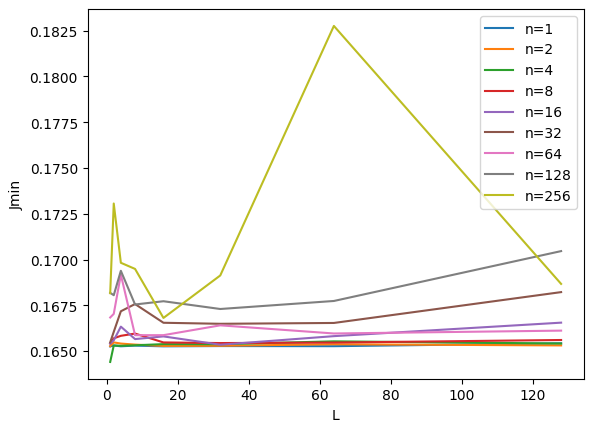

In [11]:
Jmin_sigmoid_10pi_l=[]
for element in neurons_per_hidden_layer:
  epsilon = []
  for items in num_hidden_layers:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_sigmoid_10pi_l.append(epsilon)

for arrays in Jmin_sigmoid_10pi_l :
  plt.plot(num_hidden_layers,arrays)
plt.xlabel("L")
plt.ylabel("Jmin")
plt.savefig('Jmin_sigmoid_10pi_l.svg')
plt.legend(['n=1', 'n=2', 'n=4', 'n=8','n=16','n=32','n=64','n=128','n=256','n=512','n=1024'])
plt.show()


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.1720
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1697
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1684
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1674
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1672
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1670
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1669
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 13/100
32/32 [=================

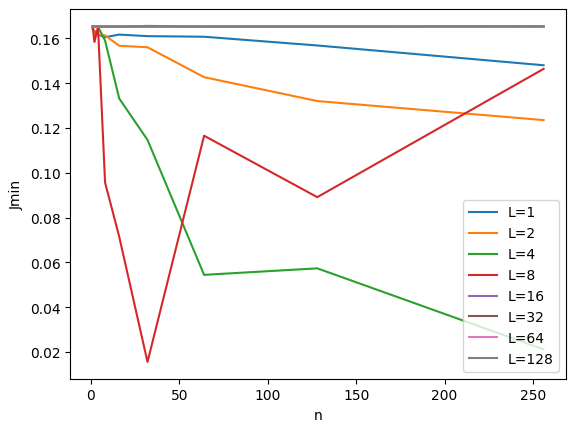

In [12]:

y_train = func(X_train, 10*np.pi)
hidden_layer_types = ['relu']
Jmin_relu_10pi_n=[]
for items in num_hidden_layers:
  epsilon = []
  for element in neurons_per_hidden_layer:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_relu_10pi_n.append(epsilon)
for arrays in Jmin_relu_10pi_n:
  plt.plot(neurons_per_hidden_layer,arrays)
plt.xlabel("n")
plt.ylabel("Jmin")
plt.savefig('Jmin_relu_10pi_n.svg')
plt.legend(['L=1', 'L=2', 'L=4', 'L=8','L=16','L=32','L=64','L=128'])
plt.show()

In [1]:

y_train = func(X_train, 10*np.pi)
hidden_layer_types = ['tanh']
Jmin_tanh_10pi_n=[]
for items in num_hidden_layers:
  epsilon = []
  for element in neurons_per_hidden_layer:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_tanh_10pi_n.append(epsilon)
for arrays in Jmin_tanh_10pi_n:
  plt.plot(neurons_per_hidden_layer,arrays)
plt.xlabel("n")
plt.ylabel("Jmin")
plt.savefig('Jmin_tan_2pi_n.svg')
plt.legend(['L=1', 'L=2', 'L=4', 'L=8','L=16','L=32','L=64','L=128'])
plt.show()

NameError: name 'func' is not defined

In [2]:
Jmin_relu_10pi_l=[]
for element in neurons_per_hidden_layer:
  epsilon = []
  for items in num_hidden_layers:
      model, num_epochs = create_custom_network(items, element, output_neurons, hidden_layer_types, input_shape, num_epochs, learning_rate)
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
      loss = history.history['loss'][-1]
      epsilon.append(loss)
  Jmin_relu_10pi_l.append(epsilon)

for arrays in Jmin_relu_10pi_l :
  plt.plot(num_hidden_layers,arrays)
plt.xlabel("L")
plt.ylabel("Jmin")
plt.savefig('Jmin_relu_10pi_l.svg')
plt.legend(['n=1', 'n=2', 'n=4', 'n=8','n=16','n=32','n=64','n=128','n=256','n=512','n=1024'])
plt.show()

NameError: name 'neurons_per_hidden_layer' is not defined

In [3]:
# np.savetxt('Jmin_tan_2pi.txt',Jmin_tan_2pi, delimiter=',')
# np.savetxt('Jmin_tanh_2pi_l.txt',Jmin_tanh_2pi_l, delimiter=',')
# np.savetxt('Jmin_relu_2pi_n.txt',Jmin_relu_2pi_n, delimiter=',')
# np.savetxt('Jmin_relu_2pi_l.txt',Jmin_relu_2pi_l, delimiter=',')
# np.savetxt('Jmin_sigmoid_2pi_l.txt',Jmin_sigmoid_2pi_l, delimiter=',')
# np.savetxt('Jmin_sigmoid_2pi_n.txt',Jmin_sigmoid_2pi_n, delimiter=',')
# np.savetxt('Jmin_tanh_5pi_n.txt',Jmin_tanh_5pi_n, delimiter=',')
# np.savetxt('Jmin_tanh_5pi_l.txt',Jmin_tanh_5pi_l, delimiter=',')
# np.savetxt('Jmin_relu_5pi_n.txt',Jmin_relu_5pi_n, delimiter=',')
# np.savetxt('Jmin_relu_5pi_l.txt',Jmin_relu_5pi_l, delimiter=',')    
# np.savetxt('Jmin_sigmoid_5pi_n.txt',Jmin_sigmoid_5pi_n, delimiter=',')
# np.savetxt('Jmin_sigmoid_5pi_l.txt',Jmin_sigmoid_5pi_l, delimiter=',')
np.savetxt('Jmin_tanh_10pi_n.txt',Jmin_tanh_10pi_n, delimiter=',')
np.savetxt('Jmin_tanh_10pi_l.txt',Jmin_tanh_10pi_l, delimiter=',')
np.savetxt('Jmin_relu_10pi_n.txt',Jmin_relu_10pi_n, delimiter=',')
np.savetxt('Jmin_relu_10pi_l.txt',Jmin_relu_10pi_l, delimiter=',')
np.savetxt('Jmin_sigmoid_10pi_n.txt',Jmin_sigmoid_10pi_n, delimiter=',')
np.savetxt('Jmin_sigmoid_10pi_l.txt',Jmin_sigmoid_10pi_l, delimiter=',')
np.savetxt('NNparams.txt',neurons_per_hidden_layer, delimiter=',')

NameError: name 'np' is not defined